# Support Vector Machines

We use soft margin SVM as one of the other methods. We would like to optimise the parameters of SVM. We choose the kernel RBF, and thus have to consider two parameters $C$ and $\gamma$. 

In the sklearn implementation of SVM, a high value of $C$, means the classifier tries to classify all training examples correctly. This would cause overfitting. A low value would cause underfitting. Thus the perfect value is inbetween. 

$\gamma$ defines how local the model fits. A high $\gamma$ puts more emphasis on local training samples, thus leading to a more squiggly fit, which could cause overfitting. A low $\gamma$ puts less emphasis on local training examples leading to a smoother line. This could cause underfitting. Thus the optimal is in the middle. 

To choose the optimal hyperparameter values, we use GridSearchCV, followed by plotting the decision regions of each svm classifier


In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

from sklearn.svm import SVC
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV

from LinearDiscriminantAnalysis import LDA_implemented
from NaiveBayes import NB_clf

from tqdm import tqdm

### Load data

In [2]:
train_data = np.load("data/fashion_train.npy")
X_train, y_train = train_data[:,:784], train_data[:,-1]

test_data = np.load("data/fashion_test.npy")
X_test, y_test = test_data[:,:784], test_data[:,-1]

N_CLASSES = len(np.unique(y_train))
CLOTHING_TYPES = {0: "T-shirt/top", 
                  1: "Trouser",
                  2: "Pullover",
                  3: "Dress",
                  4: "Shirt"}

CLOTHING_COLORS = {0: "darkorange", 
                   1: "lightseagreen",
                   2: "orangered",
                   3: "cornflowerblue",
                   4: "orchid"}

lda = LDA_implemented(4)
LDA_X_train = lda.fit_transform(X=X_train, y=y_train)
LDA_X_test = lda.transform(X_test)



LDA succesfully fitted and tranformed


### Gridsearch

In [3]:
gammas = [0.01,0.1,1,10]
Cs = [0.01,0.1,1,10]

param_grid = {'C': Cs,
              'gamma': gammas,
              'kernel': ['rbf']}

grid = GridSearchCV(estimator= SVC(), param_grid=param_grid, cv=5, verbose=3)
grid.fit(LDA_X_train[:,:2],y_train)



Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ....C=0.01, gamma=0.01, kernel=rbf;, score=0.767 total time=   1.0s
[CV 2/5] END ....C=0.01, gamma=0.01, kernel=rbf;, score=0.761 total time=   1.0s
[CV 3/5] END ....C=0.01, gamma=0.01, kernel=rbf;, score=0.770 total time=   1.0s
[CV 4/5] END ....C=0.01, gamma=0.01, kernel=rbf;, score=0.771 total time=   1.0s
[CV 5/5] END ....C=0.01, gamma=0.01, kernel=rbf;, score=0.762 total time=   1.0s
[CV 1/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.771 total time=   0.8s
[CV 2/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.777 total time=   0.8s
[CV 3/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.789 total time=   0.8s
[CV 4/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.780 total time=   0.8s
[CV 5/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.777 total time=   0.8s
[CV 1/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.750 total time=   1.4s
[CV 2/5] END .......C=0.01, gamma=1, kernel=rbf;

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1, 10],
                         'kernel': ['rbf']},
             verbose=3)

In [4]:
grid.best_estimator_

SVC(C=10, gamma=0.1)

From the above GridSearchCV, we would probably choose the parameters $C=10$ and $\gamma=0.1$.

### Plotting decision boundaries

In [5]:
# Fit models

svms = []

for i in range(len(gammas)):
    svms.append([])
    for j in tqdm(range(len(Cs))):
        clf = SVC(kernel='rbf', C=Cs[j], gamma=gammas[i])
        clf.fit(LDA_X_train[:,:2],y_train)
        svms[i].append(clf)



100%|██████████| 4/4 [00:10<00:00,  2.67s/it]


100%|██████████| 4/4 [05:48<00:00, 87.16s/it]


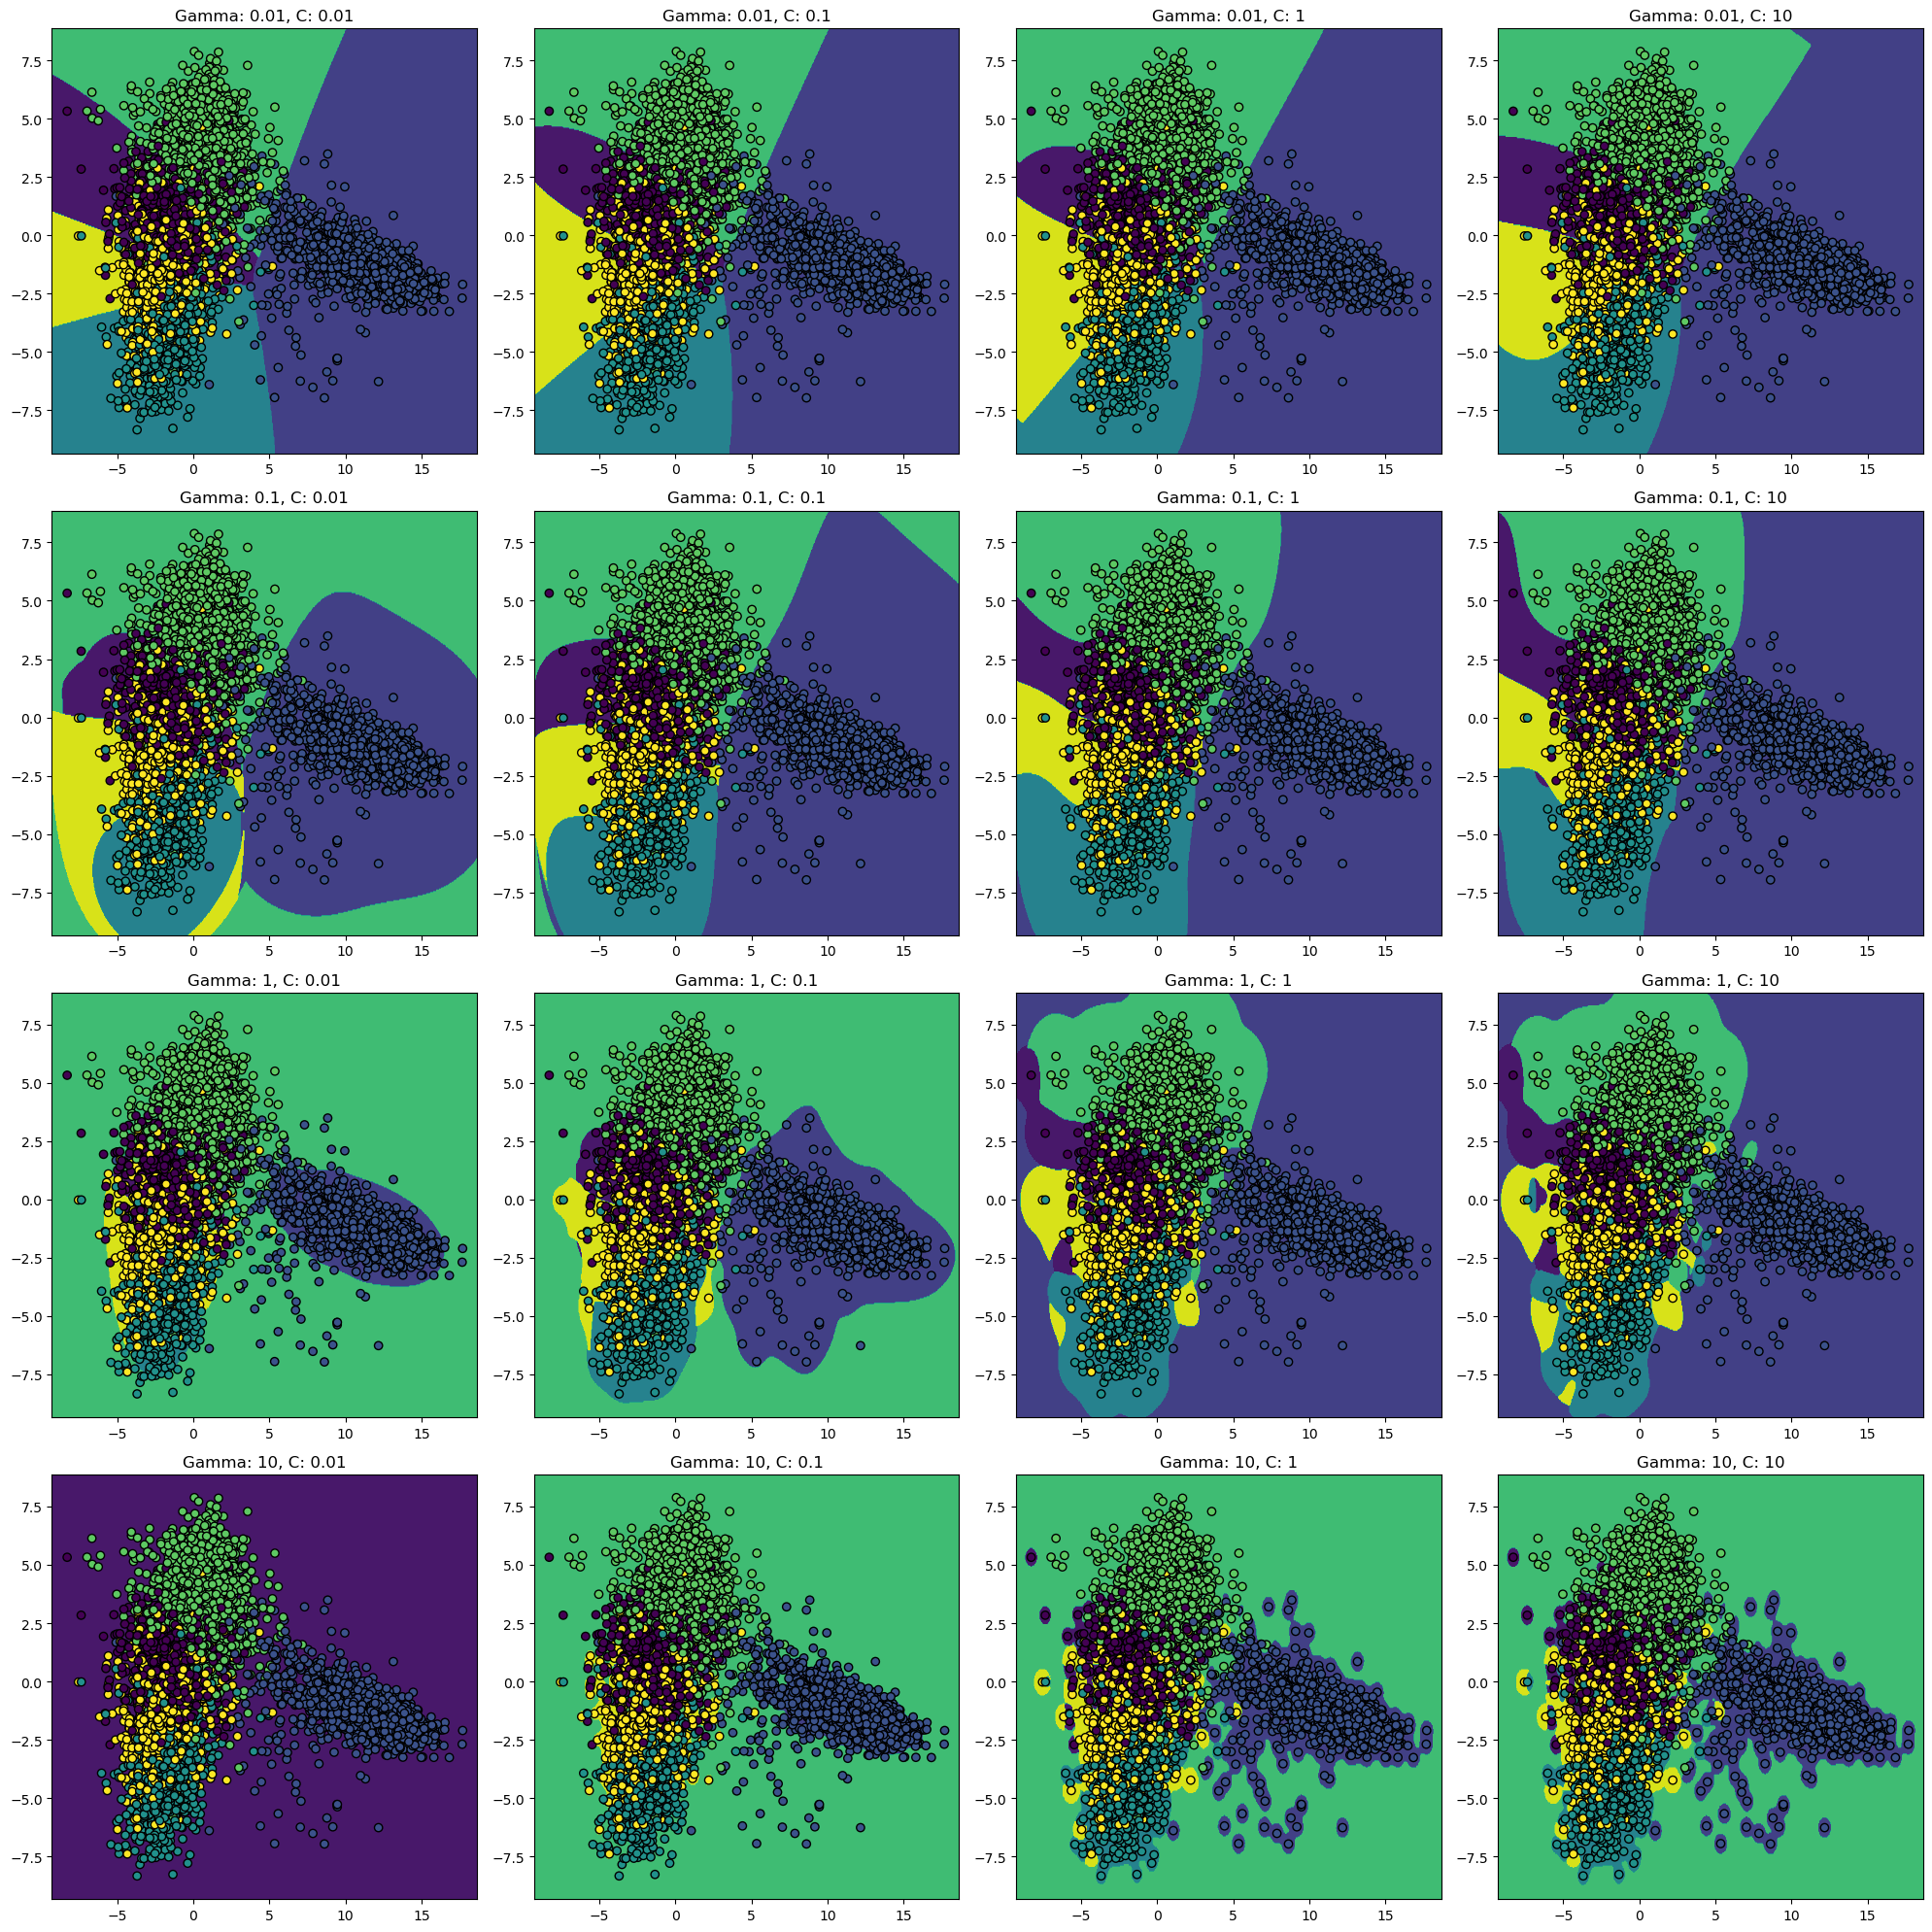

In [9]:
fig,ax = plt.subplots(nrows=4, ncols=4, figsize=(20,20))

h = 0.05

x_min, x_max = np.min(LDA_X_train[:,0])-1, np.max(LDA_X_train[:,0]) + 1
y_min, y_max = np.min(LDA_X_train[:,1])-1, np.max(LDA_X_train[:,1]) + 1

xx,yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))


for i in range(4):
    for j in tqdm(range(4)):
        Z = svms[i][j].predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        ax[i,j].contourf(xx,yy, Z)
        ax[i,j].scatter(LDA_X_train[:,0],LDA_X_train[:,1], c=y_train, marker='o', edgecolor='black')
        ax[i,j].set_xlim(xx.min(), xx.max());
        ax[i,j].set_ylim(yy.min(), yy.max());
        ax[i,j].set_title(f"Gamma: {gammas[i]}, C: {Cs[j]}")

fig.tight_layout()


Most of the SVMs above have some overfitting. We don't see a lot of underfitting. From the above, we would probably choose the SVM with $C=1$ and $\gamma = 0.1$ or even $C=1$ and $\gamma = 0.01$